# Segmentación de imágenes utilizando Naive Bayes
Para esta segmentación, se realizaron las siguientes consideraciones:  
* Las imagenes implementadas fueron en escala de grises y se les aplico un filtro de Gauss para obtener mejores datos de entrenamiento
* Se considero que los datos tenian una distribución normal
    * Se obtuvo la media y la varianza para posteriormente calcular la probabilidad de cada clase. La probabilidad más alta definia la clase a la que pertenece ese pixel  
    $$
    P(X) = \frac{1}{\sqrt{2 \pi \sigma^2 }}  e^{-1/2 (\frac{x - \mu}{\sigma})^2}
    $$


In [1]:
import matplotlib.pyplot as plt
from skimage import data, io, filters
from PIL import Image, ImageFilter
import math
import cv2
import numpy as np

### Previamente, se aplicó un filtro gaussiano a la imagen

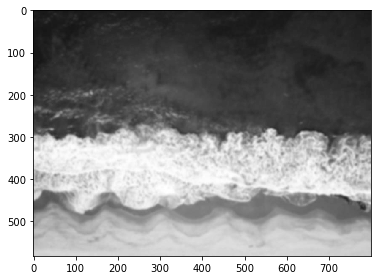

In [67]:
img = io.imread('.\\Imagenes\\fgauss.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
io.imshow(img_gray)

No. pixeles =  228000
(285, 800)


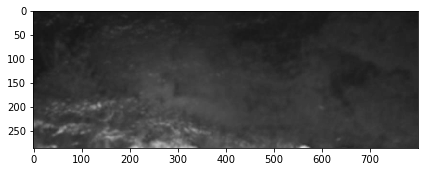

In [68]:
roi1 = img_gray[0:285, 0:800]
io.imshow(roi1)

pixRoi1 = 0
for i in range(len(roi1)):
    for j in range(len(roi1[i])):
        pixRoi1 = pixRoi1 + 1
print("No. pixeles = ", pixRoi1)
print(roi1.shape)

No. pixeles =  131200


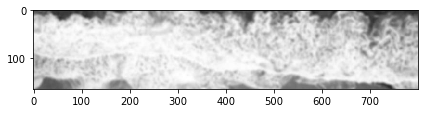

In [69]:
roi2 = img_gray[286:450, 0:800]
io.imshow(roi2)

pixRoi2 = 0
for i in range(len(roi2)):
    for j in range(len(roi2[i])):
        pixRoi2 = pixRoi2 + 1
print("No. pixeles = ", pixRoi2)

No. pixeles =  105600


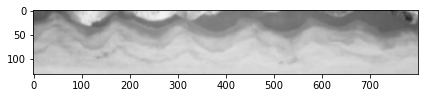

In [70]:
roi3 = img_gray[450:582, 0:800]
io.imshow(roi3)

pixRoi3 = 0
for i in range(len(roi3)):
    for j in range(len(roi3[i])):
        pixRoi3 = pixRoi3 + 1
print("No. pixeles = ", pixRoi3)

## Varianza
Al ser una imágen en blanco y negro, se calcula únicamente la varianza

In [71]:
roi1_var = np.var(roi1)
roi2_var = np.var(roi2)
roi3_var = np.var(roi3)

roi_var = np.zeros(3)
roi_var[0] = roi1_var
roi_var[1] = roi2_var
roi_var[2] = roi3_var

roi_var

array([ 368.56922847, 2077.87664725, 1429.63622374])

## Media
Se calculó para cada máscara

In [72]:
ROI_media = [0,0,0]
ROI_media[0] = np.mean(roi1)
ROI_media[1] = np.mean(roi2)
ROI_media[2] = np.mean(roi3)
ROI_media

[52.53019736842105, 203.34853658536585, 176.23666666666668]

In [73]:
imgResult = img_gray.copy()

233763 128026 103811


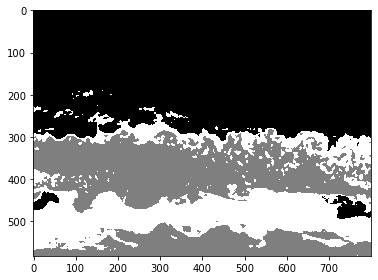

In [75]:
c0, c1, c2 = 0, 0, 0
for i in range(len(img_gray)):
    for j in range(len(img_gray[i])): # Recorremos cada pixel de la imágen
        y = [0,0,0]
        for k in range(len(ROI_media)):
            x = img_gray[i][j]
            denominador = 1 / ( (math.sqrt(2 * math.pi * roi_var[k])) )
            cociente_Exp = ( ( (x - ROI_media[k]) * (x - ROI_media[k]) ) / ( (roi_var[k])  ) )
            y[k] = denominador * math.exp( (-1/2) *cociente_Exp)

        classif = y.index(max(y))
        if classif == 0:
            c0 +=1
            imgResult[i][j] = 0

        elif classif == 1:
            c1 +=1
            imgResult[i][j] = 127

        elif classif == 2:
            c2 += 1
            imgResult[i][j] = 255

            
print(c0, c1, c2)
cv2.imwrite("naiveBayes.png",imgResult)
io.imshow(imgResult)

### Prueba 1

La clasificación de clases resulta de la siguiente manera:  
1. El color negro corresponde a la detección de agua
2. El color gris corresponde a la detección de arena
3. El color blanco corresponde a la detección de espuma de mar

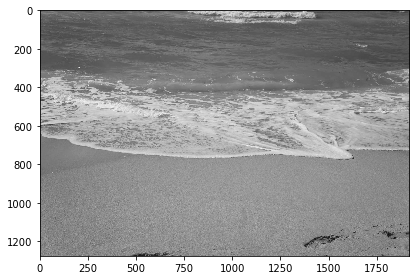

In [59]:
img1 = io.imread('.\\Imagenes\\img-prueba-1.jpg')
test1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
prueba1 = test1.copy()
io.imshow(prueba1)

381571 114070 1952359


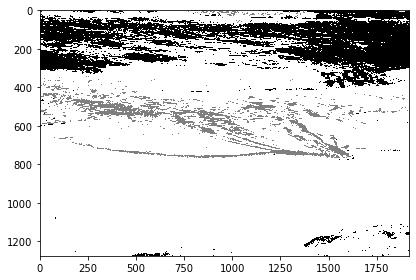

In [60]:
c0, c1, c2 = 0, 0, 0
for i in range(len(prueba1)):
    for j in range(len(prueba1[i])):
        y = [0,0,0]
        for k in range(len(ROI_media)):
            x = prueba1[i][j]
            denominador = 1 / ( (math.sqrt(2 * math.pi * roi_var[k])) )
            cociente_Exp = ( ( (x - ROI_media[k]) * (x - ROI_media[k]) ) / ( (roi_var[k])  ) )
            y[k] = denominador * math.exp( (-1/2) *cociente_Exp)
        
        classif = y.index(max(y))
        if classif == 0:
            c0 +=1
            prueba1[i][j] = 0

        elif classif == 1:
            c1 +=1
            prueba1[i][j] = 127
            
        elif classif == 2:
            c2 += 1
            prueba1[i][j] = 255

            
print(c0, c1, c2)
io.imshow(prueba1)

### Prueba 2

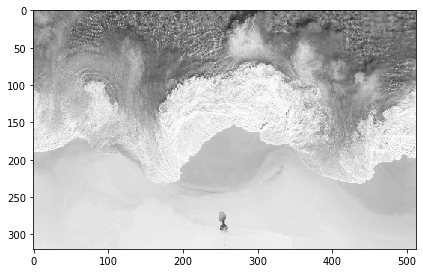

In [61]:
img2 = io.imread('.\\Imagenes\\Img1.jpg')
test2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
prueba2 = test2.copy()
io.imshow(prueba2)

5158 85403 73279


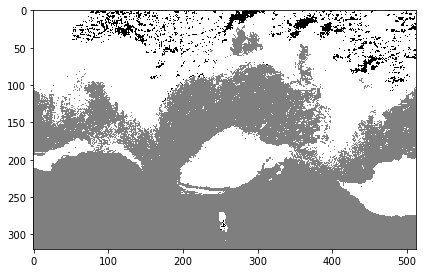

In [62]:
c0, c1, c2 = 0, 0, 0
for i in range(len(prueba2)):
    for j in range(len(prueba2[i])):
        y = [0,0,0]
        for k in range(len(ROI_media)):
            x = prueba2[i][j]
            denominador = 1 / (math.sqrt(2 * math.pi * roi_var[k]) )
            cociente_Exp = ( ((x - ROI_media[k]) * (x-ROI_media[k])) / (roi_var[k]) )
            y[k] = denominador * math.exp( (-1/2) * cociente_Exp)
        
        classif = y.index(max(y))
        if classif == 0:
            c0 +=1
            prueba2[i][j] = 0

        elif classif == 1:
            c1 +=1
            prueba2[i][j] = 127
            
        elif classif == 2:
            c2 += 1
            prueba2[i][j] = 255

            
print(c0, c1, c2)
io.imshow(prueba2)

## Prueba 3

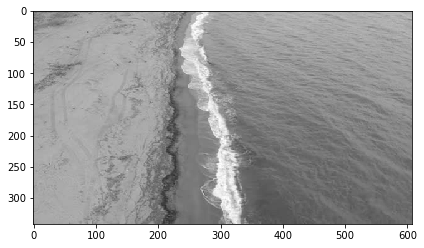

In [63]:
img3 = io.imread('.\\Imagenes\\Img3.jpg')
test3 = cv2.cvtColor(img3, cv2.COLOR_RGB2GRAY)
prueba3 = test3.copy()
io.imshow(prueba3)

11494 6937 189505


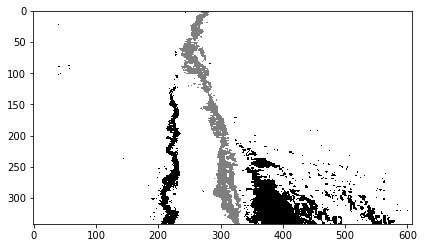

In [64]:
c0, c1, c2 = 0, 0, 0
for i in range(len(prueba3)):
    for j in range(len(prueba3[i])):
        y = [0,0,0]
        for k in range(len(ROI_media)):
            x = prueba3[i][j]
            denominador = 1 / (math.sqrt(2 * math.pi * roi_var[k]) )
            cociente_Exp = ( ((x - ROI_media[k]) * (x-ROI_media[k])) / (roi_var[k]) )
            y[k] = denominador * math.exp( (-1/2) * cociente_Exp)
        
        classif = y.index(max(y))
        if classif == 0:
            c0 +=1
            prueba3[i][j] = 0

        elif classif == 1:
            c1 +=1
            prueba3[i][j] = 127
            
        elif classif == 2:
            c2 += 1
            prueba3[i][j] = 255

            
print(c0, c1, c2)
io.imshow(prueba3)

### Prueba 4

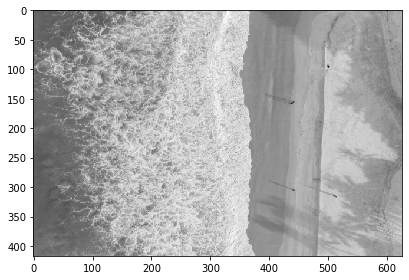

In [65]:
img4 = io.imread('.\\Imagenes\\Img4.jpg')
test4 = cv2.cvtColor(img4, cv2.COLOR_RGB2GRAY)
prueba4 = test4.copy()
io.imshow(prueba4)

8062 57406 195574


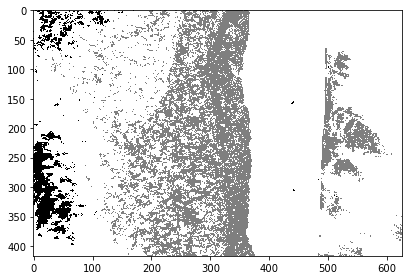

In [66]:
c0, c1, c2 = 0, 0, 0
for i in range(len(prueba4)):
    for j in range(len(prueba4[i])):
        y = [0,0,0]
        for k in range(len(ROI_media)):
            x = prueba4[i][j]
            denominador = 1 / (math.sqrt(2 * math.pi * roi_var[k]) )
            cociente_Exp = ( ((x - ROI_media[k]) * (x-ROI_media[k])) / (roi_var[k]) )
            y[k] = denominador * math.exp( (-1/2) * cociente_Exp)
        
        classif = y.index(max(y))
        if classif == 0:
            c0 +=1
            prueba4[i][j] = 0

        elif classif == 1:
            c1 +=1
            prueba4[i][j] = 127
            
        elif classif == 2:
            c2 += 1
            prueba4[i][j] = 255

            
print(c0, c1, c2)
io.imshow(prueba4)